## Python Notebook for SSI2017 Summer School

This notebook is meant to illustrate how the primary CMB anisotropies are dependent on cosmolocigal parameters

Dependencies:
numpy
matplotlib
pycamb

In [25]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

def cmb_par_dependence(ellmax,outfile,param='om'):
    ranges = np.array(1. + 0.1*np.arange(-2,3,1)) # +/- 40%
    
    if (param == 'om'):
        omh2 = np.array(0.122 * ranges)
        legname = r"$\Omega_{c} h^2$"
        legval = omh2
    elif (param == 'ob'):
        obh2 = np.array(0.022 * ranges)
        legname = r"$\Omega_{b} h^2$"
        legval = obh2
    elif (param == 'h'):
        hs = np.array(67.5 * ranges)
        legname = r"$H_0$"
        legval = hs
    elif (param == 'tau'):
        taus = np.array(0.06 * ranges**2)
        legname = r"$\tau$"
        legval = taus
    elif (param == 'ns'):
        nss = np.array(0.965 * ranges)
        legname = r"$n_s$"
        legval = nss    
    elif (param == 'As'):
        Asarr = np.array(2e-9 * ranges)
        legname = r"$A_s$"
        legval = Asarr
    elif (param == 'w'):
        ws = np.array(-1.0 * ranges)
        legname = r"$w$"
        legval = ws 
    elif (param == 'mu'):
        ranges = np.array(1. + 0.1*np.arange(0,6,1)) # +/- 40%
        mus = np.array(0.06 * ranges)
        legname = r"$\Sigma_{m_{\nu}}$"
        legval = mus
    else:
        return "not a valid parameter option"
    
    xlab = [r"$\ell$",r"$\ell$",r"$\ell$",r"L"]
    ylab = [r"$C^{TT}_\ell\,\ell(\ell + 1)/2\pi$",r"$C^{EE}_\ell\,\ell(\ell + 1)/2\pi$",
            r"$C^{TE}_\ell\,\ell(\ell + 1)/2\pi$",r"$C^{\phi \phi}_L\,L(L + 1)/2\pi$"]
    thk = 2.5
    rc('axes', linewidth=thk)
    figure(figsize=(21,15))
        
    for jj in xrange(len(ranges)):
        if (param == 'om'):
            pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=omh2[jj], mnu=0.06, omk=0, tau=0.06)
        elif (param == 'ob'):
            pars.set_cosmology(H0=67.5, ombh2=obh2[jj], omch2=0.122, mnu=0.06, omk=0, tau=0.06)
        elif (param == 'h'):
            pars.set_cosmology(H0=hs[jj], ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
        elif (param == 'tau'):
            pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=taus[jj])
        elif (param == 'mu'):
            pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mus[jj], omk=0, tau=0.06)
        else:
            pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
        if (param == 'ns'):
            pars.InitPower.set_params(As=2e-9,ns=nss[jj], r=0)
        elif (param == 'As'):
            pars.InitPower.set_params(As=Asarr[jj],ns=0.965, r=0)
        else:
            pars.InitPower.set_params(As=2e-9,ns=0.965, r=0)
        if (param == 'w'):
            pars.set_dark_energy(ws[jj])
        
        pars.set_for_lmax(ellmax, lens_potential_accuracy=1);
        #calculate results for these parameters
        results = camb.get_results(pars)
        powers = results.get_cmb_power_spectra(pars)
        totCL  = powers['total']
        lensCL = results.get_lens_potential_cls(lmax=ellmax)

        #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
        #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
        ls = np.arange(totCL.shape[0])
        ls_lens = np.arange(lensCL.shape[0])
        
        for ii in xrange(4):
            plt.subplot(2,2,ii+1)
            plt.xlabel(xlab[ii],fontsize=24,weight='bold')
            plt.ylabel(ylab[ii],fontsize=24,weight='bold')
            plt.tick_params(size=16,width=thk,labelsize = 18)
            if (ii < 2): 
                plt.plot(ls[2:],totCL[2:,ii],label=legname+ '=' + np.str(legval[jj]))
            elif(ii == 2):
                plt.plot(ls[2:],totCL[2:,ii+1],label=legname+ '=' + np.str(legval[jj]))
            else:
                plt.plot(ls_lens[2:],lensCL[2:,0],label=legname+ '=' + np.str(legval[jj]))

            leg = legend(loc=1,prop={"size":16})
    #leg.draw_frame(False)
 
    return

Populating the interactive namespace from numpy and matplotlib


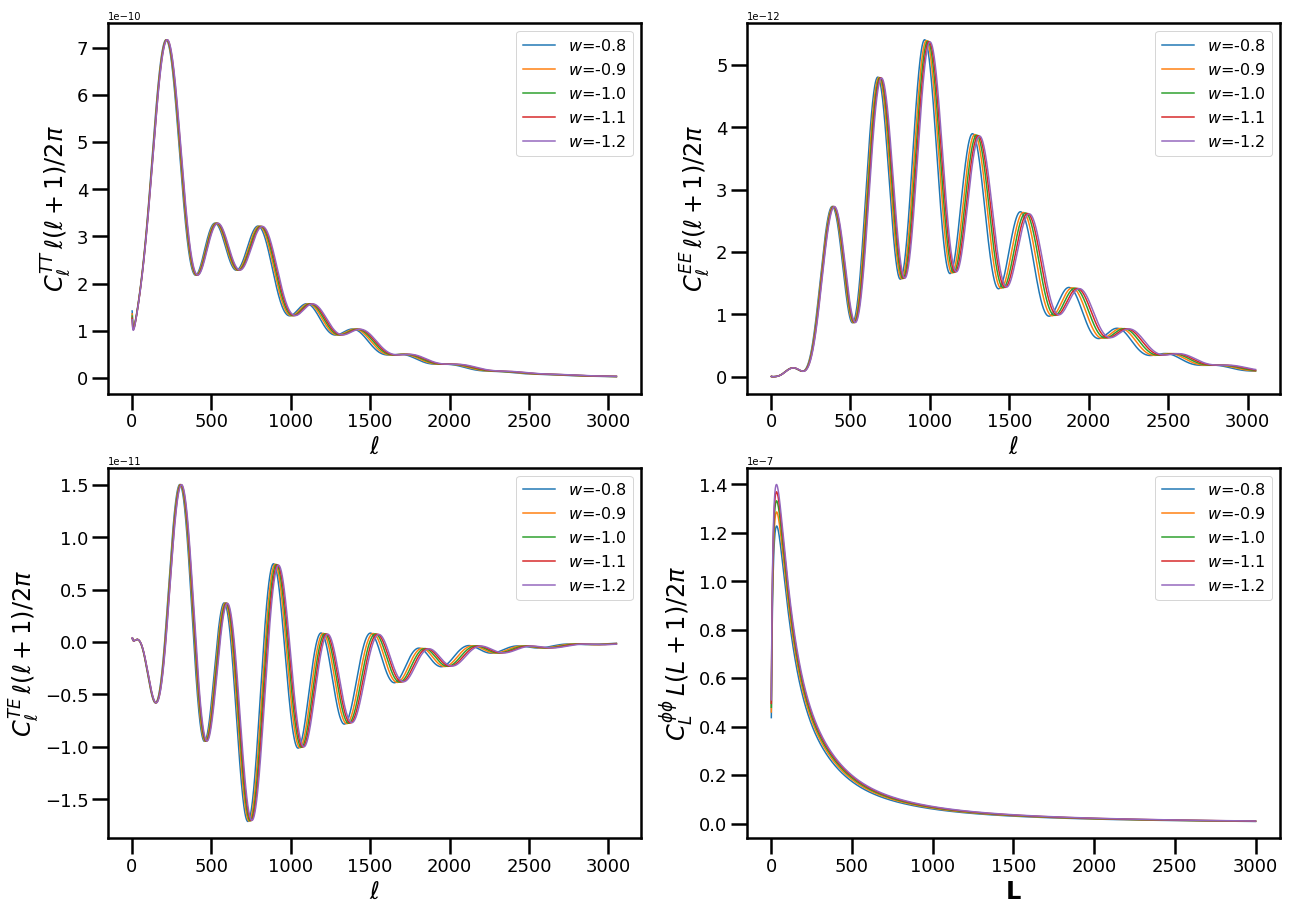

In [26]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(3000, lens_potential_accuracy=1);
#calculate results for these parameters
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars)


totCL=powers['total']
ls = np.arange(totCL.shape[0])

cmb_par_dependence(3000,'blah',param='w') 
#cmb_par_dependence(3000,'blah',param='ob') 